In [1]:
import numpy as np

### Creating the data

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]) 

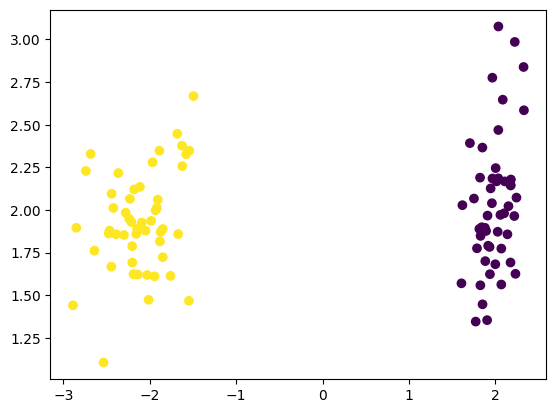

In [209]:
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, class_sep=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
X.shape

(4, 2)

### Making the Neuron

In [153]:
from typing import Any


class Neuron:
    def __init__(self, input_size, random_state=42):
        np.random.seed(random_state)
        
        if isinstance(input_size, int):
            self.weights = np.random.randn(input_size)
            
        else:
            self.weights = np.random.randn(*input_size)
        
        self.bias = np.random.random(1)
        
        self.input = None
        self.z = None
        self.output = None
        
    def __call__(self, x):
        return self.forward(x)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, input):
        self.input = input
        self.z = np.dot(input, self.weights) + self.bias
        self.output = self.sigmoid(self.z)
        return self.output
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def get_params(self):
        return self.weights, self.bias
    
    # We need to calcualte the gradients of w and b.
    # Here we are trying to minimize the loss w.r.t w and b
    # d(loss)/d(weights) and d(loss)/d(bias) == ?
    
    # loss = 1/2 * (target - output)**2
    # d_loss / d_output = 2 * (1/2) * (target - output) * (-1) == output - target
    
    # z = wx + b
    # output = sigmoid(z)
    # d_output / d_z = sigmoid_derivative(z)
    # d_loss / d_z = (d_loss / d_output) * (d_output / d_z)
    
    # d_z / d_w = inputs
    # d_z / d_b = 1
    # d_loss / d_w = (d_loss / d_output) * (d_output / d_z) * (d_z / d_w)
    # d_loss / d_b = (d_loss / d_output) * (d_output / d_z) * (d_z / d_b)
    
    def backward(self, target, learning_rate=0.01):
        
        d_loss_ouptut = self.output - target
        d_output_z = self.sigmoid_derivative(self.z)
        
        d_z_w = self.input
        d_z_b = 1
        
        d_loss_w = d_loss_ouptut * d_output_z * d_z_w
        d_loss_b = d_loss_ouptut * d_output_z * d_z_b
        
        self.weights -= learning_rate * d_loss_w
        self.bias -= learning_rate * d_loss_b

In [158]:
N = Neuron(2)

In [159]:
N(X[1]), N(X[1]).shape

(array([0.64422044]), (1,))

In [160]:
old_params = N.get_params()
old_params

(array([ 0.49671415, -0.1382643 ]), array([0.73199394]))

In [161]:
# we can see that for input [0, 1] only the weight 2 is changing hence we are going on the right track
N.backward(y[1])
print(N.get_params())

(array([ 0.49671415, -0.13744885]), array([0.73280939]))


In [182]:
epochs = 1000
num_features = 2

model = Neuron(num_features)

In [183]:
losses = []
for epoch in range(epochs):
    total_loss = 0
    for features, output in zip(X, y):
        yhat = model(features)

        loss = model.mse(output, yhat)
        total_loss += loss
        model.backward(output)
    
    avg_loss = total_loss/len(y)
    losses.append(avg_loss)
    if epoch % 100==0:  
        print(f"EPOCH: {epoch} || LOSS: {avg_loss}")

EPOCH: 0 || LOSS: 0.29863835996543703
EPOCH: 100 || LOSS: 0.28013878039008944
EPOCH: 200 || LOSS: 0.26734989709199003
EPOCH: 300 || LOSS: 0.2598101863469563
EPOCH: 400 || LOSS: 0.25580232567520306
EPOCH: 500 || LOSS: 0.25376521657239426
EPOCH: 600 || LOSS: 0.2527226636979246
EPOCH: 700 || LOSS: 0.25215977862173167
EPOCH: 800 || LOSS: 0.25182620910537695
EPOCH: 900 || LOSS: 0.2516047114763081


In [184]:
model(X[3])

array([0.48450732])

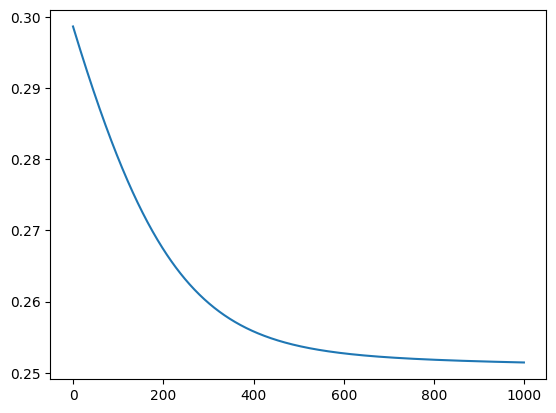

In [186]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [194]:
(w1, w2), b = model.get_params()
w1, w2, b

m = -(w1/w2)
c = -(b/w2).item()
m, c

(0.25266083684266766, 0.5019142590576963)

In [197]:
x_inputs = np.linspace(0, 1)
y_outs = m*x_inputs + c

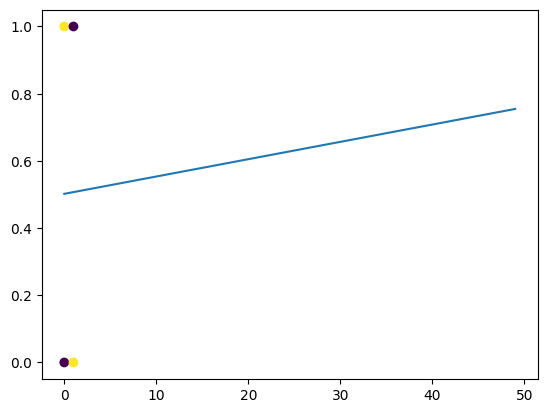

In [198]:
plt.plot(y_outs)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)